# OpenCV로 이미지에 대한 히스토그램 구현하기

## 히스토그램이란?
이미지 밝기 분포를 그래프로 나타낸 것으로, 가로축은 픽셀의 밝기값으로 구성되고, 세로축은 해당 밝기 값을 갖는 픽셀의 빈도수를 의미한다.

In [32]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [25]:
img1 = cv2.imread('./temp_image/siba.jpg',0)
img2 = cv2.imread('./temp_image/wow_siba.jpg',0)

In [26]:
hist1 = cv2.calcHist([img1], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])

- cv2.calcHist()함수는 이미지의 히스토그램을 계산하는 함수이다.
    - `images`: 히스토그램을 계산할 이미지의 array, 대괄호로 묶어서 리스트 형태로 전달된다.
    - `channels`: 채널의 인덱스를 나타내는 array, 컬러이미지일 경우 B[0], G[1], R[2] 3개의 채널을 쓸수 있다.
    - `mask`: 이미지의 특정부분만 계산하고 싶을때 사용하는 마스크
    - `histSize`: 각 차원의 히스토그램 크기를 나타내는 배열
    - `ranges`: 각 차원의 히스토그램 범위

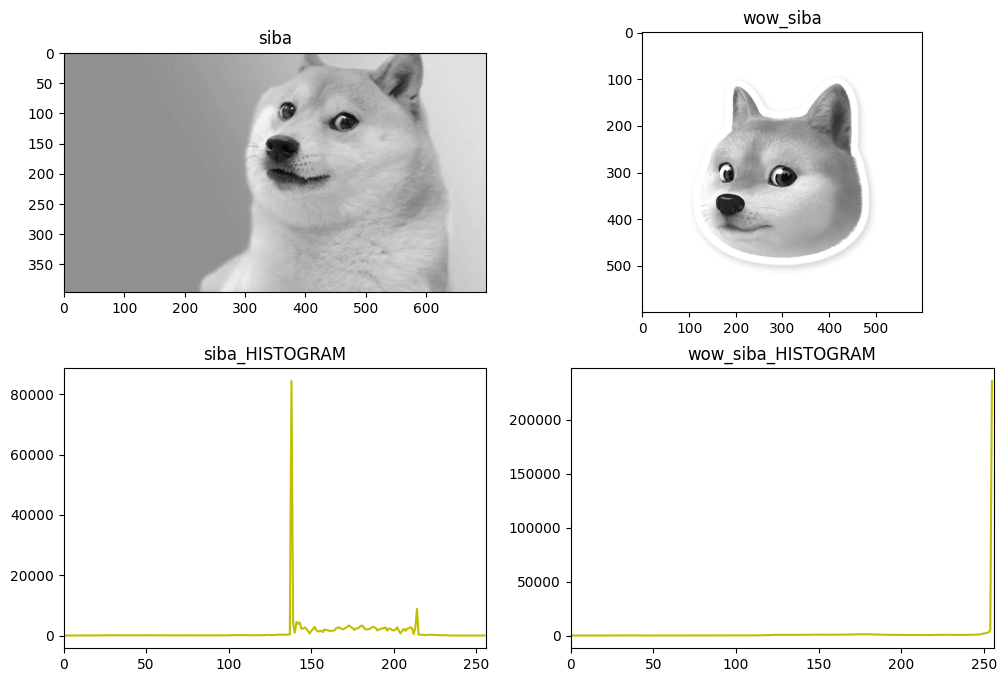

In [27]:
plt.figure(figsize=(12,8))
plt.subplot(221)
plt.imshow(img1, 'grey')
plt.title('siba')

plt.subplot(222)
plt.imshow(img2, 'grey')
plt.title('wow_siba')

plt.subplot(223)
plt.plot(hist1, color='y')
plt.title('siba_HISTOGRAM')
plt.xlim([0, 256])

plt.subplot(224)
plt.plot(hist2, color='y')
plt.title('wow_siba_HISTOGRAM')
plt.xlim([0, 256])

plt.show()

고찰:히스토그램으로 이 사진이 어떤 밝기를 가지는지를 대략적으로 살펴볼 수 있었다.

## Mask를 적용한 히스토그램

In [33]:
# 1.이미지 로딩
img3 = cv2.imread('./temp_image/flower_siba.jpg',0)

In [35]:
# # 2.이미지와 그 형태(shape) 출력
print(img3,'\n')
print(img3.shape) #2차원이미지 (height(y), width(x))

[[ 29  29  29 ... 159 154 133]
 [ 29  29  28 ... 143 138 137]
 [ 28  28  28 ... 128 125 145]
 ...
 [152 164 172 ...  51  47  43]
 [148 158 164 ...  50  44  38]
 [160 168 171 ...  47  40  33]] 

(168, 300)


In [36]:
# 3.이미지 컬러 변환
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)

In [55]:
# 4.마스크 생성 및 적용
mask = np.zeros(img3.shape[:2], np.uint8)
mask[20:120, 100:200] = 255
masked_img = cv2.bitwise_and(img3, img3, mask=mask)

In [53]:
# 5.히스토그램 계산
hist_full = cv2.calcHist([img3], [1], None, [256], [0, 256])
hist_mask = cv2.calcHist([img3], [1], mask, [256], [0, 256])

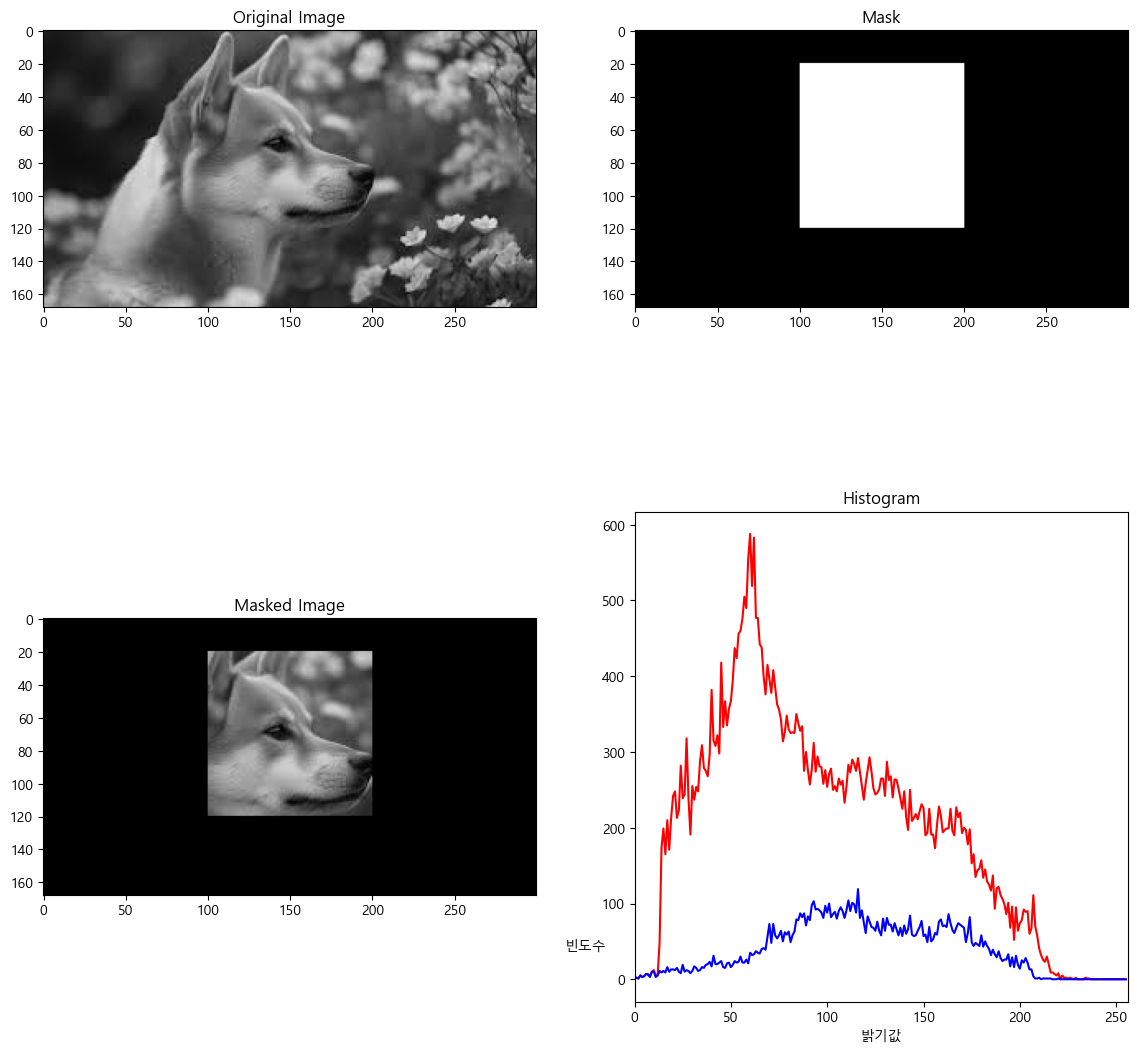

In [67]:
# 6.이미지 표시
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

plt.figure(figsize=(14,14))
plt.subplot(221)
plt.imshow(img3, 'gray')
plt.title('Original Image')

plt.subplot(222)
plt.imshow(mask, 'gray')
plt.title('Mask')

plt.subplot(223)
plt.imshow(masked_img, 'gray')
plt.title('Masked Image')

plt.subplot(224)
plt.title('Histogram')
plt.xlabel('밝기값')
plt.ylabel('빈도수', rotation=0)
plt.gca().yaxis.set_label_coords(-0.1, 0.1)
plt.plot(hist_full, color='r')
plt.plot(hist_mask, color='b')
plt.xlim([0, 256])

plt.show()